In [1]:
# Import dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [2]:
# # Python SQL toolkit and Object Relational Mapper

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [3]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect=True)

In [5]:
# We can view all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
measurements = base.classes.measurement
stations = base.classes.station

In [7]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Climate Analysis


/Users/jss/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0, 0.5, 'Precipitation (in.)')

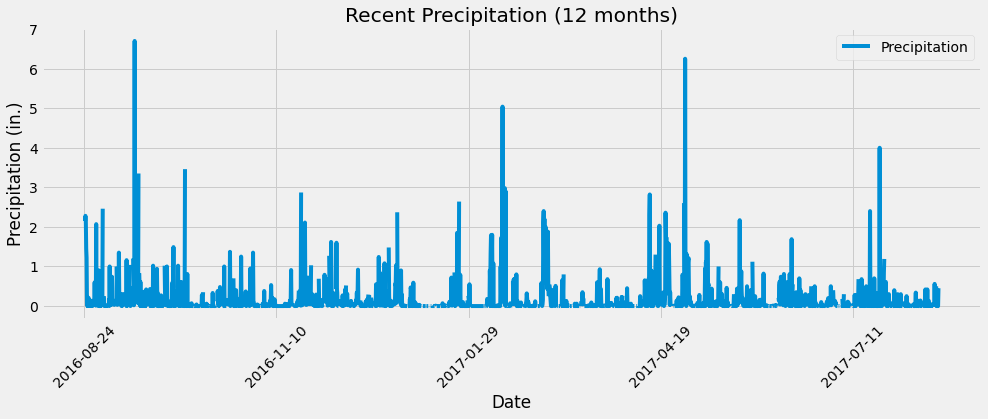

In [10]:
#Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# since session.query returns a tuple, we use [0][0] to get the value at the first entry

# and datetime.strptime to convert it to a datetime object 

# and subtract a year from it with dt.timedelta

date_max = dt.datetime.strptime(session.query(func.max(measurements.date))[0][0],'%Y-%m-%d')

prior_year = date_max - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores

precip_df = session.query(measurements.prcp, measurements.date).filter(measurements.date >= prior_year)

# Save the query results as a Pandas DataFrame

precip_df = pd.DataFrame(precip_df)

# Rename columns to capitalize axis labels

precip_df = precip_df.rename(columns = {"date":"Date","prcp":"Precipitation"})

# Sort the dataframe by date

precip_df = precip_df.sort_values(by="Date")

# Set the index to the date column

precip_df = precip_df.set_index("Date")

# Write Database to CSV for access from app.py later

precip_df.to_csv("Resources/precip_df.csv")

# Use Pandas Plotting with Matplotlib to plot the data

precip_df.plot(rot=45,figsize=(15,5))
plt.title("Recent Precipitation (12 months)")
plt.ylabel("Precipitation (in.)")

In [16]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(stations.station).count()
print(f"This dataset contains {station_count} unique stations.")

This dataset contains 9 unique stations.


In [21]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_count = session.query(stations.station, stations.name, func.count(measurements.station)).\
    filter(measurements.station == stations
.station).\
    group_by(measurements.station).\
    order_by(func.count(measurements.station).desc())
station_count_df = pd.DataFrame(station_count, columns = ["Station ID","Station Name","Activity Count"])
station_count_df

,Station ID,Station Name,Activity Count
0,USC00519281,"WAIHEE 837.5, HI US",2772
1,USC00519397,"WAIKIKI 717.2, HI US",2724
2,USC00513117,"KANEOHE 838.1, HI US",2709
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2669
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",2612
5,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2202
6,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",1979
7,USC00517948,"PEARL CITY, HI US",1372
8,USC00518838,"UPPER WAHIAWA 874.3, HI US",511


In [30]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station
selected = [func.min(measurements.tobs), func.max(measurements.tobs), func.avg(measurements.tobs), func.count(measurements.tobs)]
temps = session.query(*selected).\
    filter(measurements.station == 'USC00519281')
    
for rec in records:
    print(f"For Station USC00519281:")
    print(f"Min Temprature is: {rec[0]}")
    print(f"Max Temprature is: {rec[1]}")
    print(f"Average Temprature is: {round(rec[2], 1)}")

For Station USC00519281:
Min Temprature is: 54.0
Max Temprature is: 85.0
Average Temprature is: 71.7


In [34]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
hight_temps = session.query(measurements.tobs,measurements.date).\
    filter(measurements.date >= prior_year).\
        filter(measurements.station == 'USC00519281').\
            order_by(measurements.date.asc()).\
                all()
# turn query into a dataframe

high_temps_df = pd.DataFrame(high_temps).set_index('date').sort_index(ascending=True)


# plot the dataframe

temp_df.plot(kind='hist',bins=12)
plt.title(f"Frequency of Temperatures at Station USC00519281")
plt.ylabel('Frequency')
plt.xlabel('Temperature (F)')


NameError: name 'high_temps' is not defined